In [105]:
import thinkdsp
import numpy as np
import thinkplot
import scipy.signal

%matplotlib inline

def reverse_notch_filter(segment2, qfactor=.99, freq=3400):
    x = segment2.ys
    y = [ 0 for i in xrange(len(segment2.ys))]
    q = .70
    p = .90
    wo = (freq * np.pi * 2) / segment2.framerate

    y[0] = x[0] + 2 * q - 2 * p

    y[1] = x[1] + 2 * p * np.cos(wo) * y[0] - 2 * q * np.cos(wo) * x[0]

    for i in range(2, len(segment2.ys)):
        y[i] = x[i] + 2* p * np.cos(wo) * y[i-1] - p * p * y[i - 2] - 2 * q * np.cos(wo) * x[i-1] + q*q*x[i - 2]
        #print(y[i])
    return thinkdsp.Wave(y, segment2.framerate)



# def reverse_notch_filter(segment, q=.9, freq=3400):
#     w = (freq * np.pi * 2) / segment.framerate
#     A = [1, -2.0*q*np.cos(w), 1]
#     B = [1, -2.0*q*np.cos(w), 1]
#     filt = scipy.signal.lfilter(B,A,segment.ys)
#     return filt
    

def detect_one_or_zero(segment, qfactor=.99, lowfreq=2300, highfreq=3400):
    if len(segment.ys) < 3:
        print("too short")
        return
    lowwave = reverse_notch_filter(segment, qfactor, lowfreq)

    highwave = reverse_notch_filter(segment, qfactor, highfreq)
    
    lowAverage = np.average(np.absolute(lowwave.ys))
    highAverage = np.average(np.absolute(highwave.ys))
    if lowAverage > highAverage and lowAverage > 100: #tweak constant
        return "1"
    elif highAverage > lowAverage and highAverage > 100: #tweak me
        return "0"
def find_start_and_end(xf, threshold = 2000): 
    import numpy as np    
    start_idx = -1
 
    for k in range(0, len(xf)):
        if(np.abs(xf[k])) > threshold:
            start_idx = k
            break

    if(start_idx  < 0):
        print("Unable to detect start of transmission")
        return -1
    
    end_idx = -1
    
    for k in range(0, len(xf)):
        if(np.abs(xf[len(xf)-k-1])) > threshold:
            end_idx = len(xf)-k-1
            break

    if(end_idx < 0):
        print("Unable to detect end of transmission")
        return -1

    return start_idx, end_idx

def process_wav(filename, symbolLength=.5):
    wave = thinkdsp.read_wave(filename)
     #(start, end) = find_start_and_end(wave.ys, 150)
    subwave = thinkdsp.Wave(wave.ys, wave.framerate)
    for i in range(0, int(round(subwave.duration / symbolLength))):
        print(detect_one_or_zero(subwave))

In [106]:
#wav = reverse_notch_filter(test, qfactor=.99, freq=3400)
#wav.plot()

In [ ]:
test = thinkdsp.read_wave("ToneTest.wav")
process_wav("ToneTest.wav")


0
0
0
0
0

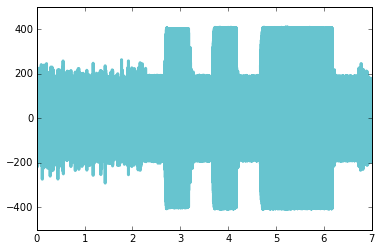

In [104]:
wav.plot()